# Decision Trees

## Remember Binary Trees in ECE244? Haha, me neither. 

Alright I need to stop goofing around in this notebook. 



## What's the intuition? 

- Recursively split the data into "purer" subsets 
- Stop when 
    - Data is perfectly classified 
    - Max depth is reached 
    - No further improvement can be made 


Or, if you run of resources, which if you're a university student like me you likely will. 

A good example would be, let's say you're hungry and you want to hit up the McDonald's at your mall. 

You'd be thinking about the weather, the amount of time you have, and how hungry you are.

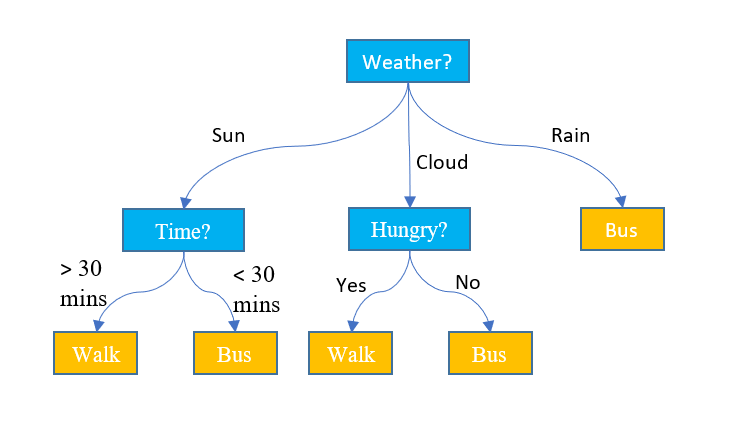

Weather, Time, and Hungry would be a feature in terms of Machine Learning. 

The intuition is simple, but HOW do we know if a decision is better than the other? 

## Decision Tree structure 

A decision tree *partitions* the input space into **axis-aligned regions** using a binary tree. 

Each internal node splits the feature $x_ij$ with a threshold $t$: 

$$
\text{If } x_j \leq t \Rightarrow \text{go left} \\
\text{Else } \Rightarrow \text{go right}
$$

## Decision Tree Node

This is a **decision point** in the tree

- It represents a **subset of the data**
- It either **splits data further** or **output a prediction**

### Node Type 1: Internal Node 

- Contains a rule like $ \text{if } x_j ≤ t$
- **Splits** the data into two child nodes: 
    - Left: Samples satisfying this 
    - Right: Samples that don't

The tree will learn **structure** and **branches** here

### Node Type 2: Leaf Node

- Terminal Node: Has no children 
- Stores the **final prediction**
    - Classification: **Majority Class** 
    - Regression: **Mean Value**

    

## Traversal and Impurity Functions
At each node, the goal is to **choose the best split** based on some impurity metric. 

There are two common options

### 1. Gini Impurity 
$$
G(D) = 1 - \sum_{k=1}^{K} p_k^2
$$

- $D$ is the dataset at the node 
- $p_k$ is the **proportion** of class $k$ in $D$

Minizming this means purer child nodes.

### 2. Entropy and Information Gain 

Entropy is calculated as the following:

$$
H(D) = - \sum_{k=1}^{K} p_k \log_2 p_k
$$

Next, the information gain from a split is: 

$$
\text{Gain}(D, A) = H(D) - \sum_{v \in \text{values}(A)} \frac{|D_v|}{|D|} H(D_v)
$$

### 3. Mean Squared Error (Regression)
$$
\text{MSE}(D) = \frac{1}{|D|} \sum_{i \in D} (y_i - \bar{y})^2
$$


## Training Procedure 

### At each node: 
- Try all possible features and thresholds 
- Choose the split with **best impurity reduction**

### Stop when: 
- Max depth reached (This is a parameter you set)
- Minimum samples per node
- Node is pure

### Prediction Logic 

- For classification: Return **majority class** in the leaf 
- For regression: Return **mean target value**

## Code Implementation of Decision Trees 

### Decision Node Class

In [1]:
class DecisionNode: 
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

### Gini Impurity Computation Helper Functions 

In [2]:


def compute_Gini_split(y_left=None, y_right=None):
    n = len(y_left) + len(y_right)
    gini_left = compute_Gini_impurity(y_left)
    gini_right = compute_Gini_impurity(y_right)
    gini_split = (gini_left)*(len(y_left)/n) + (gini_right)*(len(y_right)/n)
    return gini_split

def compute_Gini_impurity(y):
    gini = 1
    size = len(y)

    occurrences = {}

    for element in y:
        occurrences[element] = occurrences.get(element, 0) + 1
    
    for outcome in occurrences:
        gini -= (occurrences[outcome]/size)*(occurrences[outcome]/size)
    
    return gini
    

### build_tree function 

In [3]:
def build_tree(X=None, y=None, depth = 0, max_depth = 0, min_samples_split = 0):
    # These are stopping conditions
    # Purity
    pure = (len(set(y)) == 1)
    if pure:
        return DecisionNode(value = y[0])
    
    # Too few samples or too deep down the tree
    if(len(y) < min_samples_split) or (depth >= max_depth):
        majority = most_common_label(y)
        return DecisionNode(value=majority)

    # Get the amount of features
    num_features = X.shape[1]

    best_gini = float('inf')
    best_feature = None
    best_threshold = None
    best_splits = None

    # For now, utilize, only taking midpoints of all the values
    for feature in range(num_features):
        samples_features = [sample[feature] for sample in X]        
        samples_features.sort()

        test_thresholds = return_thresholds(samples_features)

        for threshold in test_thresholds:
            X_left, y_left = []
            X_right, y_right = []

            for row in range(len(X)):
                if X[row][feature] < threshold:
                    X_left.append(X[row])
                    y_left.append(y[row])
                else:
                    X_right.append(X[row])
                    y_right.append(y[row])
            
            if (len(X_left) == 0) or (len(X_right) == 0):
                continue
        
            current_gini_split = compute_Gini_split(y_left, y_right)
            if(current_gini_split < best_gini):
                best_gini = current_gini_split
                best_feature = feature
                best_threshold = threshold
                best_splits = (X_left, y_left, X_right, y_right)



        #Splitting logic based on thresholds

    # Start splitting based on thresholds
    # If no more good splits left

def return_thresholds(samples_features=None):
    test_thresholds = []

    for feature in range(len(samples_features) - 1):
        average = (samples_features[feature] + samples_features[feature + 1])/2.0
        test_thresholds.append(average)
        
    return test_thresholds
    

def most_common_label(y=None):
    counts = {}
    for label in y:
        counts[label] = counts.get(label, 0) + 1
    
    return max(counts, key=counts.get)